In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics 

C:\Users\lekha\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('E:/Projects/AV_Hackathon/train_ZoGVYWq.csv')
df.shape

(79853, 13)

In [10]:
(df['renewal'].value_counts())/df.shape[0]

1    0.93741
0    0.06259
Name: renewal, dtype: float64

In [4]:
df.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
premium                               int64
renewal                               int64
dtype: object

In [42]:
df.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
renewal                                0
age_in_years                           0
dtype: int64

In [43]:
df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal,age_in_years
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410,51.599444
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226,14.260696
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000,20.999316
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000,40.996578
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000,50.992471
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000,61.973990
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000,102.948665


In [28]:
# Perc_premium - Policies renewed have less perc paid by cash or credit
print(df['perc_premium_paid_by_cash_credit'].quantile([0.25,0.35,0.5,0.75,0.8,0.95,0.99]))
print(df.groupby('renewal').aggregate({'perc_premium_paid_by_cash_credit' : 'mean'}))
print(df.groupby('renewal').aggregate({'perc_premium_paid_by_cash_credit' : 'median'}))
print(min(df.perc_premium_paid_by_cash_credit))
print(max(df.perc_premium_paid_by_cash_credit))

0.25    0.034
0.35    0.067
0.50    0.167
0.75    0.538
0.80    0.658
0.95    1.000
0.99    1.000
Name: perc_premium_paid_by_cash_credit, dtype: float64
         perc_premium_paid_by_cash_credit
renewal                                  
0                                0.626626
1                                0.293433
         perc_premium_paid_by_cash_credit
renewal                                  
0                                   0.728
1                                   0.148
0.0
1.0


In [19]:
# Age of policy holders who renewed is slightly higher
print(df['age_in_days'].quantile([0.1,0.25,0.35,0.5,0.75,0.8,0.95,0.99]))
print(df.groupby('renewal').aggregate({'age_in_days' : 'mean'}))
print(df.groupby('renewal').aggregate({'age_in_days' : 'median'}))

0.10    12051.0
0.25    14974.0
0.35    16438.0
0.50    18625.0
0.75    22636.0
0.80    23368.0
0.95    27754.0
0.99    31396.0
Name: age_in_days, dtype: float64
          age_in_days
renewal              
0        16929.642657
1        18974.696867
         age_in_days
renewal             
0            16800.5
1            18630.0


In [3]:
df['age_in_years'] = df['age_in_days']/365.25
print(df['age_in_years'].quantile([0.1,0.25,0.35,0.5,0.75,0.8,0.95,0.99,0.999]))
print(df.groupby('renewal').aggregate({'age_in_years' : 'mean'}))
print(df.groupby('renewal').aggregate({'age_in_years' : 'median'}))
print(min(df.age_in_years))
print(max(df.age_in_years))

0.100    32.993840
0.250    40.996578
0.350    45.004791
0.500    50.992471
0.750    61.973990
0.800    63.978097
0.950    75.986311
0.990    85.957563
0.999    91.975765
Name: age_in_years, dtype: float64
         age_in_years
renewal              
0           46.350835
1           51.949889
         age_in_years
renewal              
0           45.997262
1           51.006160
20.9993155373
102.948665298


In [35]:
print(df['Income'].quantile([0.1,0.25,0.35,0.5,0.75,0.8,0.95,0.99,0.998]))
print(df.groupby('renewal').aggregate({'Income' : 'mean'}))
print(df.groupby('renewal').aggregate({'Income' : 'median'}))
print(min(df.Income))
print(max(df.Income))

0.100      71200.00
0.250     108010.00
0.350     130100.00
0.500     166560.00
0.750     252090.00
0.800     279030.00
0.950     450050.00
0.990     771078.00
0.998    1826578.88
Name: Income, dtype: float64
                Income
renewal               
0        177058.799520
1        210969.651727
         Income
renewal        
0        138100
1        168870
24030
90262600


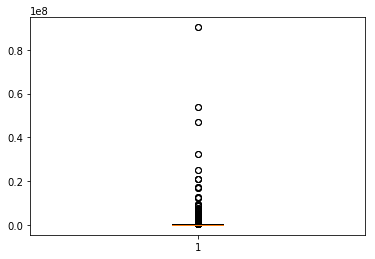

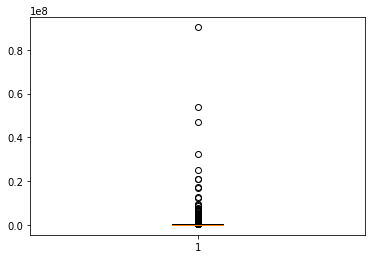

In [34]:
plt.figure()
plt.boxplot(df.Income)
plt.show()

In [37]:
print(df.groupby('renewal').aggregate({'Count_3-6_months_late' : 'sum','Count_6-12_months_late' : 'sum','Count_more_than_12_months_late' : 'sum'}))

         Count_3-6_months_late  Count_6-12_months_late  \
renewal                                                  
0                       4536.0                  2787.0   
1                      15297.0                  3449.0   

         Count_more_than_12_months_late  
renewal                                  
0                                1738.0  
1                                3048.0  


In [41]:
print(df.groupby(['renewal','Count_3-6_months_late' ])['id'].count())

renewal  Count_3-6_months_late
0        0.0                       2627
         1.0                       1153
         2.0                        592
         3.0                        288
         4.0                        158
         5.0                         67
         6.0                         31
         7.0                         10
         8.0                          6
         9.0                          2
         10.0                         1
         11.0                         1
         12.0                         1
         13.0                         1
1        0.0                      64174
         1.0                       7673
         2.0                       1927
         3.0                        666
         4.0                        216
         5.0                        101
         6.0                         37
         7.0                         13
         8.0                          9
         9.0                          2
Name: id,

In [49]:
# No difference in no_of_premiums paid among the customers
print(df['no_of_premiums_paid'].quantile([0.1,0.25,0.35,0.5,0.75,0.8,0.95,0.99,0.999]))
print(df.groupby('renewal').aggregate({'no_of_premiums_paid' : 'mean'}))
print(df.groupby('renewal').aggregate({'no_of_premiums_paid' : 'median'}))
print(min(df.no_of_premiums_paid))
print(max(df.no_of_premiums_paid))


0.100     5.0
0.250     7.0
0.350     8.0
0.500    10.0
0.750    14.0
0.800    15.0
0.950    20.0
0.990    27.0
0.999    37.0
Name: no_of_premiums_paid, dtype: float64
         no_of_premiums_paid
renewal                     
0                  10.410364
1                  10.894169
         no_of_premiums_paid
renewal                     
0                         10
1                         10
2
60


In [50]:
# No difference in application_underwriting_score among the customers
print(df['application_underwriting_score'].quantile([0.1,0.25,0.35,0.5,0.75,0.8,0.95,0.99,0.999]))
print(df.groupby('renewal').aggregate({'application_underwriting_score' : 'mean'}))
print(df.groupby('renewal').aggregate({'application_underwriting_score' : 'median'}))
print(min(df.application_underwriting_score))
print(max(df.application_underwriting_score))


0.100    98.29
0.250    98.81
0.350    99.00
0.500    99.21
0.750    99.54
0.800    99.61
0.950    99.87
0.990    99.89
0.999    99.89
Name: application_underwriting_score, dtype: float64
         application_underwriting_score
renewal                                
0                             98.870256
1                             99.080407
         application_underwriting_score
renewal                                
0                                 99.05
1                                 99.22
91.9
99.89


In [51]:
# Not much difference in premium
print(df['premium'].quantile([0.1,0.25,0.35,0.5,0.75,0.8,0.95,0.99,0.999]))
print(df.groupby('renewal').aggregate({'premium' : 'mean'}))
print(df.groupby('renewal').aggregate({'premium' : 'median'}))
print(min(df.premium))
print(max(df.premium))

0.100     3300.0
0.250     5400.0
0.350     5700.0
0.500     7500.0
0.750    13800.0
0.800    15900.0
0.950    28500.0
0.990    51600.0
0.999    60000.0
Name: premium, dtype: float64
              premium
renewal              
0         9599.519808
1        11012.975753
         premium
renewal         
0           7500
1           7500
1200
60000


In [60]:
# Sourcing Channel A is the best for renewal
df.groupby(['renewal','sourcing_channel'])['id'].count()/df.groupby('renewal')['id'].count()

renewal  sourcing_channel
0        A                   0.469988
         B                   0.213285
         C                   0.180672
         D                   0.126851
         E                   0.009204
1        A                   0.544853
         B                   0.206346
         C                   0.148768
         D                   0.092512
         E                   0.007521
Name: id, dtype: float64

In [61]:
#'residence_area_type' is not much different among renewal/non-renewal customers  
df.groupby(['renewal','residence_area_type'])['id'].count()/df.groupby('renewal')['id'].count()

renewal  residence_area_type
0        Rural                  0.399760
         Urban                  0.600240
1        Rural                  0.396393
         Urban                  0.603607
Name: id, dtype: float64

In [222]:
df2 = df.copy(deep = True)
cat = pd.get_dummies(df2[['residence_area_type','sourcing_channel']])
df2 = pd.concat([df2[df2.columns.difference(['residence_area_type','sourcing_channel'])],cat[cat.columns.difference([
'residence_area_type_Rural','sourcing_channel_E'])]],axis = 1)

In [5]:
df2.head()

,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Income,age_in_days,age_in_years,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type_Urban,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D
0,0.0,0.0,0.0,355060,12058,33.013005,99.02,110936,13,0.429,3300,1,1,0,0,1,0
1,0.0,0.0,0.0,315150,21546,58.989733,99.89,41492,21,0.010,18000,1,1,1,0,0,0
2,2.0,3.0,1.0,84140,17531,47.997262,98.69,31300,7,0.917,3300,0,0,0,0,1,0
3,0.0,0.0,0.0,250510,15341,42.001369,99.57,19415,9,0.049,9600,1,1,1,0,0,0
4,0.0,0.0,0.0,198680,31400,85.968515,99.87,99379,12,0.052,9600,1,1,0,1,0,0


In [223]:
df2.set_index('id',inplace = True)

In [7]:
tr = df2[df2.application_underwriting_score.notnull()]
te = df2[df2.application_underwriting_score.isnull()]
tr_X = tr[tr.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
tr_Y = tr.application_underwriting_score
te_X = te[te.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
te_Y = te.application_underwriting_score

In [8]:
tr_X = sm.add_constant(tr_X)
te_X = sm.add_constant(te_X)
mod = sm.OLS(tr_Y,tr_X)
res = mod.fit()
pred = res.predict(te_X)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     application_underwriting_score   R-squared:                       0.149
Model:                                        OLS   Adj. R-squared:                  0.149
Method:                             Least Squares   F-statistic:                     1227.
Date:                            Sun, 22 Jul 2018   Prob (F-statistic):               0.00
Time:                                    10:05:33   Log-Likelihood:                -79699.
No. Observations:                           76879   AIC:                         1.594e+05
Df Residuals:                               76867   BIC:                         1.595e+05
Df Model:                                      11                                         
Covariance Type:                        nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               99.3376      0.032   3128.277      0.000      99.275      99.400
Income                             1.02e-07   7.21e-09     14.142      0.000    8.78e-08    1.16e-07
age_in_days                       6.553e-06   5.19e-07     12.633      0.000    5.54e-06    7.57e-06
age_in_years                      1.814e-08   1.42e-09     12.775      0.000    1.54e-08    2.09e-08
no_of_premiums_paid                 -0.0492      0.001    -98.022      0.000      -0.050      -0.048
perc_premium_paid_by_cash_credit    -0.3580      0.008    -44.993      0.000      -0.374      -0.342
premium                           1.346e-05   2.89e-07     46.490      0.000    1.29e-05     1.4e-05
renewal                              0.0748      0.010      7.134      0.000       0.054       0.095
residence_area_type_Urban            0.0010      0.005      0.197      0.844      -0.009       0.011
sourcing_channel_A                   0.0514      0.028      1.827      0.068      -0.004       0.107
sourcing_channel_B                   0.0223      0.028      0.785      0.432      -0.033       0.078
sourcing_channel_C                  -0.0539      0.029     -1.886      0.059      -0.110       0.002
sourcing_channel_D                  -0.0074      0.029     -0.256      0.798      -0.064       0.049
==============================================================================
Omnibus:                    50897.476   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           979632.902
Skew:                          -2.920   Prob(JB):                         0.00
Kurtosis:                      19.484   Cond. No.                     4.32e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.43e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
df2.loc[df2.index.isin(pred.index),'application_underwriting_score'] = pred

In [271]:
df2['application_underwriting_score'].isnull().sum()

0

In [224]:
df2.loc[df2['Count_3-6_months_late'].isnull(),'Count_3-6_months_late'] = df2['Count_3-6_months_late'].mean()
df2.loc[df2['Count_6-12_months_late'].isnull(),'Count_6-12_months_late'] = df2['Count_6-12_months_late'].mean()
df2.loc[df2['Count_more_than_12_months_late'].isnull(),'Count_more_than_12_months_late'] = df2['Count_more_than_12_months_late'].mean()

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [188]:
df2['renewal'].value_counts()

1    74855
0     4998
Name: renewal, dtype: int64

In [189]:
df2['incentive'] = 0.1*df2['premium']
print(df2['incentive'].quantile([0.1,0.25,0.35,0.5,0.75,0.8,0.95,0.99,0.999]))

0.100     330.0
0.250     540.0
0.350     570.0
0.500     750.0
0.750    1380.0
0.800    1590.0
0.950    2850.0
0.990    5160.0
0.999    6000.0
Name: incentive, dtype: float64


In [69]:
X_train,X_test,Y_train,Y_test = train_test_split(df2[df2.columns.difference(['renewal'])],df2.renewal,test_size = 0.3)

In [140]:
Y_train.value_counts()

1    52407
0     3490
Name: renewal, dtype: int64

In [224]:
Y_test.value_counts()

1    22439
0     1517
Name: renewal, dtype: int64

In [73]:
model = XGBClassifier(learning_rate=0.1)
model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [74]:
Y_pred = model.predict(X_test)
Y_pred_prob = model.predict_proba(X_test)

In [150]:
model.classes_

array([0, 1], dtype=int64)

In [75]:
y_pred_prob_1 = []
for arr in Y_pred_prob:
    y_pred_prob_1.append(arr[1])
y_pred_prob_1

[0.98378569,
 0.94772512,
 0.91039985,
 0.99127227,
 0.94486994,
 0.88576937,
 0.98402125,
 0.99285638,
 0.98335636,
 0.9735747,
 0.66707349,
 0.95676464,
 0.57174546,
 0.93579292,
 0.95431727,
 0.59187973,
 0.96272522,
 0.95574582,
 0.87223411,
 0.99091035,
 0.98199189,
 0.98725986,
 0.9880988,
 0.97815698,
 0.9218058,
 0.97681695,
 0.96114385,
 0.75825125,
 0.89446616,
 0.98689365,
 0.86404198,
 0.91880685,
 0.89283329,
 0.93775743,
 0.99158734,
 0.83981574,
 0.68223763,
 0.98210746,
 0.98299938,
 0.97639811,
 0.29824996,
 0.98200202,
 0.94676822,
 0.97722989,
 0.44406989,
 0.99272472,
 0.8958773,
 0.91672927,
 0.98745233,
 0.91730428,
 0.99313426,
 0.98816282,
 0.77903372,
 0.97521383,
 0.94535291,
 0.97421139,
 0.99285638,
 0.6634804,
 0.98856342,
 0.93490553,
 0.97028875,
 0.98762649,
 0.98861665,
 0.99227071,
 0.9881357,
 0.98149729,
 0.96580142,
 0.92026204,
 0.97488075,
 0.93939674,
 0.94671899,
 0.72849065,
 0.98971409,
 0.93905789,
 0.97205937,
 0.99033874,
 0.95908719,
 0.98

In [76]:
metrics.roc_auc_score(Y_test,y_pred_prob_1)

0.84477380122469747

In [20]:
len(model.feature_importances_)

15

In [23]:
pd.DataFrame({'features': X_train.columns,'importance' : model.feature_importances_})

,features,importance
0,Count_3-6_months_late,0.140533
1,Count_6-12_months_late,0.127219
2,Count_more_than_12_months_late,0.112426
3,Income,0.107988
4,age_in_days,0.099112
5,age_in_years,0.000000
6,application_underwriting_score,0.147929
7,no_of_premiums_paid,0.082840
8,perc_premium_paid_by_cash_credit,0.142012
9,premium,0.022189


### Test Data

In [231]:
df_test = pd.read_csv('E:/Projects/AV_Hackathon/test_66516Ee.csv')
df_test.shape

(34224, 12)

In [152]:
df_test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
dtype: int64

In [232]:
df_test['age_in_years'] = df_test['age_in_days']/365.25

In [233]:
df_test.set_index('id',inplace = True)

In [47]:
df_test.describe()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,age_in_years
count,34224.000000,34224.000000,3.422400e+04,34193.000000,34193.000000,34193.000000,32901.000000,34224.000000,34224.000000,34224.000000
mean,0.314457,18824.215346,2.028201e+05,0.238733,0.080718,0.058111,99.061898,10.890428,10834.721248,51.537893
std,0.334059,5246.525604,2.702536e+05,0.686162,0.454634,0.307046,0.742942,5.216867,9263.074506,14.364204
min,0.000000,7671.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,21.002053
25%,0.034000,14972.000000,1.063975e+05,0.000000,0.000000,0.000000,98.800000,7.000000,5400.000000,40.991102
50%,0.169000,18623.000000,1.650700e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,50.986995
75%,0.540000,22636.000000,2.500200e+05,0.000000,0.000000,0.000000,99.530000,14.000000,13800.000000,61.973990
max,1.000000,35785.000000,2.191455e+07,12.000000,10.000000,7.000000,99.890000,59.000000,60000.000000,97.973990


In [234]:
df_test.loc[df_test['Count_3-6_months_late'].isnull(),'Count_3-6_months_late'] = df_test['Count_3-6_months_late'].mean()
df_test.loc[df_test['Count_6-12_months_late'].isnull(),'Count_6-12_months_late'] = df_test['Count_6-12_months_late'].mean()
df_test.loc[df_test['Count_more_than_12_months_late'].isnull(),'Count_more_than_12_months_late'] = df_test['Count_more_than_12_months_late'].mean()

In [235]:
cat = pd.get_dummies(df_test[['residence_area_type','sourcing_channel']])
df_test = pd.concat([df_test[df_test.columns.difference(['residence_area_type','sourcing_channel'])],cat[cat.columns.difference([
'residence_area_type_Rural','sourcing_channel_E'])]],axis = 1)

In [169]:
tr = df_test[df_test.application_underwriting_score.notnull()]
te = df_test[df_test.application_underwriting_score.isnull()]
tr_X = tr[tr.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
tr_Y = tr.application_underwriting_score
te_X = te[te.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
te_Y = te.application_underwriting_score

In [170]:
tr_X = sm.add_constant(tr_X)
te_X = sm.add_constant(te_X)
mod = sm.OLS(tr_Y,tr_X)
res = mod.fit()
pred = res.predict(te_X)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     application_underwriting_score   R-squared:                       0.156
Model:                                        OLS   Adj. R-squared:                  0.156
Method:                             Least Squares   F-statistic:                     607.1
Date:                            Sun, 22 Jul 2018   Prob (F-statistic):               0.00
Time:                                    13:09:48   Log-Likelihood:                -34121.
No. Observations:                           32901   AIC:                         6.826e+04
Df Residuals:                               32890   BIC:                         6.836e+04
Df Model:                                      10                                         
Covariance Type:                        nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               99.4046      0.046   2140.406      0.000      99.314      99.496
Income                            3.453e-07      2e-08     17.277      0.000    3.06e-07    3.84e-07
age_in_days                       4.722e-06   7.87e-07      6.002      0.000    3.18e-06    6.26e-06
age_in_years                      1.288e-08   2.15e-09      5.980      0.000    8.66e-09    1.71e-08
no_of_premiums_paid                 -0.0499      0.001    -65.593      0.000      -0.051      -0.048
perc_premium_paid_by_cash_credit    -0.3890      0.012    -32.725      0.000      -0.412      -0.366
premium                           1.024e-05   4.93e-07     20.749      0.000    9.27e-06    1.12e-05
residence_area_type_Urban            0.0029      0.008      0.382      0.702      -0.012       0.018
sourcing_channel_A                   0.0984      0.043      2.270      0.023       0.013       0.183
sourcing_channel_B                   0.0598      0.044      1.366      0.172      -0.026       0.146
sourcing_channel_C                  -0.0258      0.044     -0.585      0.558      -0.112       0.061
sourcing_channel_D                   0.0054      0.045      0.122      0.903      -0.082       0.093
==============================================================================
Omnibus:                    20838.434   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           345990.475
Skew:                          -2.792   Prob(JB):                         0.00
Kurtosis:                      17.873   Cond. No.                     5.12e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [171]:
df_test.loc[df_test.index.isin(pred.index),'application_underwriting_score'] = pred

In [160]:
df_test['application_underwriting_score'].isnull().sum()

0

In [161]:
test_proba = model.predict_proba(df_test)
test_prob_1 = []
for arr in test_proba:
    test_prob_1.append(arr[1])
test_prob_1

[0.992347,
 0.9816581,
 0.91772366,
 0.97200292,
 0.94901216,
 0.98312181,
 0.81856984,
 0.80746466,
 0.98806071,
 0.99247712,
 0.98749232,
 0.96546835,
 0.56562626,
 0.95483291,
 0.95442951,
 0.96928966,
 0.99285638,
 0.69158548,
 0.97575706,
 0.97887909,
 0.92364961,
 0.92739135,
 0.86197507,
 0.70015311,
 0.99106127,
 0.96320146,
 0.96313363,
 0.98493946,
 0.69113368,
 0.98633504,
 0.98370117,
 0.96694171,
 0.98528451,
 0.9543004,
 0.80184054,
 0.97298098,
 0.85066056,
 0.98953712,
 0.94285262,
 0.97321802,
 0.99103981,
 0.98482978,
 0.92472649,
 0.98980039,
 0.98985296,
 0.97980243,
 0.98528451,
 0.97973162,
 0.94834238,
 0.96452945,
 0.90246725,
 0.95380259,
 0.97926396,
 0.97231197,
 0.99013865,
 0.95699197,
 0.99342841,
 0.97333807,
 0.98872596,
 0.97638947,
 0.96546972,
 0.61864668,
 0.99039674,
 0.30077481,
 0.98652762,
 0.9587183,
 0.9450891,
 0.96965933,
 0.78077096,
 0.9869709,
 0.58010417,
 0.98762333,
 0.88389796,
 0.92915446,
 0.98991019,
 0.93383861,
 0.72333932,
 0.973

In [162]:
df_test['incentives'] = 0.02 * df_test['premium']

In [163]:
df_test['renewal'] = test_prob_1

In [222]:
df_test[['renewal','incentives']].to_csv('E:/Projects/AV_Hackathon/xgb.csv')

### SVM

In [275]:
X_train.head()

,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Income,age_in_days,age_in_years,application_underwriting_score,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,residence_area_type_Urban,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D
id,,,,,,,,,,,,,,,
90458,0.0,0.0,0.0,97570,16804,46.006845,99.56,11,0.003,3300,0,1,0,0,0
84545,0.0,0.0,0.0,79650,27751,75.978097,98.62,10,0.063,3300,1,1,0,0,0
45891,0.0,0.0,0.0,121090,20086,54.992471,98.52,12,0.239,5400,1,1,0,0,0
57600,1.0,0.0,0.0,204150,17164,46.992471,99.00,10,0.133,11700,1,0,0,1,0
75823,0.0,1.0,0.0,416770,20810,56.974675,99.87,4,0.891,18000,1,1,0,0,0


In [ ]:
from sklearn.svm import SVC
clf = SVC(probability = True)
clf.fit(X_train, Y_train)

In [278]:
svm_prob = clf.predict_proba(X_test)
svm_pred_prob = []
for a in svm_prob:
    svm_pred_prob.append(a[1])
svm_pred_prob

AttributeError: predict_proba is not available when  probability=False

In [ ]:
metrics.roc_auc_score(Y_test,svm_pred_prob)

### Resample dataset

In [28]:
df2.head()

,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Income,age_in_days,age_in_years,application_underwriting_score,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type_Urban,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D
id,,,,,,,,,,,,,,,,
110936,0.0,0.0,0.0,355060,12058,33.013005,99.02,13,0.429,3300,1,1,0,0,1,0
41492,0.0,0.0,0.0,315150,21546,58.989733,99.89,21,0.010,18000,1,1,1,0,0,0
31300,2.0,3.0,1.0,84140,17531,47.997262,98.69,7,0.917,3300,0,0,0,0,1,0
19415,0.0,0.0,0.0,250510,15341,42.001369,99.57,9,0.049,9600,1,1,1,0,0,0
99379,0.0,0.0,0.0,198680,31400,85.968515,99.87,12,0.052,9600,1,1,0,1,0,0


In [31]:
from sklearn.utils import resample
sample = pd.DataFrame()

t = resample(df2[df2['renewal'] == 1],replace = False,n_samples =39927,random_state = 1234)
sample = sample.append(t)
t = resample(df2[df2['renewal'] == 0],n_samples = 39926,random_state = 1234)
sample = sample.append(t)
print(sample.shape)
sample.head()

(79853, 16)


,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Income,age_in_days,age_in_years,application_underwriting_score,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type_Urban,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D
id,,,,,,,,,,,,,,,,
84332,0.0,0.0,0.0,108060,10595,29.007529,99.89,4,0.033,5400,1,0,1,0,0,0
24802,0.0,0.0,0.0,366600,20083,54.984257,99.46,11,0.194,1200,1,1,0,1,0,0
11679,0.0,0.0,0.0,180060,17165,46.995209,99.49,11,0.022,1200,1,1,1,0,0,0
74208,2.0,0.0,0.0,150050,18991,51.994524,98.54,14,0.000,7500,1,1,0,0,1,0
86739,0.0,0.0,0.0,130120,16073,44.005476,98.99,15,0.045,5400,1,1,1,0,0,0


In [32]:
X_train_re,X_test_re,Y_train_re,Y_test_re = train_test_split(sample[sample.columns.difference(['renewal'])],sample.renewal,test_size = 0.3)

In [33]:
model_re = XGBClassifier(learning_rate=0.1)
model_re.fit(X_train_re,Y_train_re)
re_prob = model_re.predict_proba(X_test_re)

In [34]:
y_pred_re_prob = []
for arr in re_prob:
    y_pred_re_prob.append(arr[1])
metrics.roc_auc_score(Y_test_re,y_pred_re_prob)

0.8483133450964333

In [36]:
pd.DataFrame({'features': X_train_re.columns,'importance' : model.feature_importances_})

,features,importance
0,Count_3-6_months_late,0.140533
1,Count_6-12_months_late,0.127219
2,Count_more_than_12_months_late,0.112426
3,Income,0.107988
4,age_in_days,0.099112
5,age_in_years,0.000000
6,application_underwriting_score,0.147929
7,no_of_premiums_paid,0.082840
8,perc_premium_paid_by_cash_credit,0.142012
9,premium,0.022189


### Feature tuning  

In [37]:
df3 = df.copy(deep = True)
df3.set_index('id',inplace = True)

In [38]:
df3.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,age_in_years
id,,,,,,,,,,,,,
110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33.013005
41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,58.989733
31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,47.997262
19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42.001369
99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,85.968515


In [62]:
tr3 = df3[df3.application_underwriting_score.notnull()]
te3 = df3[df3.application_underwriting_score.isnull()]
tr3_X = tr3[tr3.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
tr3_Y = tr3.application_underwriting_score
te3_X = te3[te3.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
te3_Y = te3.application_underwriting_score

In [63]:
tr3_X = sm.add_constant(tr3_X)
te3_X = sm.add_constant(te3_X)
mod3 = sm.OLS(tr3_Y,tr3_X)
res3 = mod3.fit()
pred3 = res3.predict(te3_X)
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     application_underwriting_score   R-squared:                       0.149
Model:                                        OLS   Adj. R-squared:                  0.148
Method:                             Least Squares   F-statistic:                     1676.
Date:                            Sun, 22 Jul 2018   Prob (F-statistic):               0.00
Time:                                    11:06:21   Log-Likelihood:                -79735.
No. Observations:                           76879   AIC:                         1.595e+05
Df Residuals:                               76870   BIC:                         1.596e+05
Df Model:                                       8                                         
Covariance Type:                        nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               99.3819      0.016   6206.546      0.000      99.350      99.413
Income                            1.019e-07   7.21e-09     14.119      0.000    8.77e-08    1.16e-07
age_in_days                       6.803e-06   5.18e-07     13.135      0.000    5.79e-06    7.82e-06
age_in_years                      1.882e-08   1.42e-09     13.275      0.000     1.6e-08    2.16e-08
no_of_premiums_paid                 -0.0493      0.001    -98.177      0.000      -0.050      -0.048
perc_premium_paid_by_cash_credit    -0.3579      0.008    -44.977      0.000      -0.374      -0.342
premium                           1.345e-05    2.9e-07     46.442      0.000    1.29e-05     1.4e-05
renewal                              0.0746      0.010      7.114      0.000       0.054       0.095
residence_area_type                  0.0009      0.005      0.182      0.855      -0.009       0.011
sourcing_channel                    -0.0296      0.002    -12.219      0.000      -0.034      -0.025
==============================================================================
Omnibus:                    50894.431   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           979941.299
Skew:                          -2.920   Prob(JB):                         0.00
Kurtosis:                      19.487   Cond. No.                     4.32e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.44e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
df3.loc[df3.index.isin(pred3.index),'application_underwriting_score'] = pred3

In [59]:
df3.loc[df3['Count_3-6_months_late'].isnull(),'Count_3-6_months_late'] = df3['Count_3-6_months_late'].mean()
df3.loc[df3['Count_6-12_months_late'].isnull(),'Count_6-12_months_late'] = df3['Count_6-12_months_late'].mean()
df3.loc[df3['Count_more_than_12_months_late'].isnull(),'Count_more_than_12_months_late'] = df3['Count_more_than_12_months_late'].mean()

In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df3['sourcing_channel'])
df3['sourcing_channel'] = le.transform(df3['sourcing_channel'])
df3['sourcing_channel'].value_counts()

0    43134
1    16512
2    12039
3     7559
4      609
Name: sourcing_channel, dtype: int64

In [61]:
le.fit(df3['residence_area_type'])
df3['residence_area_type'] = le.transform(df3['residence_area_type'])
df3['residence_area_type'].value_counts()

1    48183
0    31670
Name: residence_area_type, dtype: int64

In [ ]:
#pd.cut(df3['Income'])

In [65]:
X_train_le,X_test_le,Y_train_le,Y_test_le = train_test_split(df3[df3.columns.difference(['renewal'])],df3.renewal,test_size = 0.3)

In [66]:
model_le = XGBClassifier(learning_rate=0.1)
model_le.fit(X_train_le,Y_train_le)
le_prob = model_le.predict_proba(X_test_le)[:,1]

In [67]:
# y_pred_le_prob = []
# for arr in le_prob:
#     y_pred_le_prob.append(arr[1])
metrics.roc_auc_score(Y_test_le,le_prob)

0.84159127588781046

In [68]:
model_le.feature_importances_

array([ 0.12772134,  0.1233672 ,  0.09433962,  0.10595065,  0.1233672 ,
        0.        ,  0.13207547,  0.10304789,  0.1436865 ,  0.02612482,
        0.00435414,  0.01596517], dtype=float32)

### Test with resample

In [53]:
df_test.shape

(34224, 15)

In [56]:
test_proba_re = model.predict_proba(df_test)[:,1]
# test_prob_1 = []
# for arr in test_proba:
#     test_prob_1.append(arr[1])
# test_prob_1
df_test['renewal'] = test_proba_re

In [57]:
df_test['incentives'] = 0.02 * df_test['premium']

In [58]:
df_test[['renewal','incentives']].to_csv('E:/Projects/AV_Hackathon/xgb_resample.csv')

### Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)
pred_rf_prob = model_rf.predict_proba(X_test)[:,1]
metrics.roc_auc_score(Y_test,pred_rf_prob)

0.7540539892635878

### Logistic Regression

In [72]:
model_lr = linear_model.LogisticRegression()
result_lr = model_lr.fit(X_train,Y_train)
pred_prob_logr = model_lr.predict_proba(X_test)[:,1]
metrics.roc_auc_score(Y_test,pred_prob_logr )

0.62922635060096177

### XgBoost with CV

In [330]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=10) # Define the split - into 2 folds 
model_xgb = XGBClassifier(learning_rate=0.1)
X = df2[df2.columns.difference(['renewal'])]
Y = df2.renewal
res=[]
for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X[X.index.isin(train_index)], X[X.index.isin(test_index)]
    y_train_cv, y_test_cv = Y[Y.index.isin(train_index)], Y[Y.index.isin(test_index)]
    pred_cv_xgb = model_xgb.fit(X_train_cv,y_train_cv).predict_proba(X_test_cv)[:,1]
    res.append(metrics.roc_auc_score(y_test_cv,pred_cv_xgb))
print(res)
print(np.mean(res))

[0.83844853855449109, 0.84278380483947868, 0.83724457388783657, 0.82670783271355242, 0.86265199519314784, 0.83800737378852008, 0.84803934528806124, 0.84954138492361642, 0.8358508519414366, 0.85243882104634983]
0.843171452218


In [91]:
pd.DataFrame({'features': X_train_cv.columns,'importance' : model_xgb.feature_importances_})

,features,importance
0,Count_3-6_months_late,0.120588
1,Count_6-12_months_late,0.110294
2,Count_more_than_12_months_late,0.100000
3,Income,0.100000
4,age_in_days,0.116176
5,age_in_years,0.000000
6,application_underwriting_score,0.160294
7,no_of_premiums_paid,0.100000
8,perc_premium_paid_by_cash_credit,0.167647
9,premium,0.013235


### Test with XgB 10-fold CV

In [331]:
df_test = df_test[df_test.columns.difference(['renewal','incentives'])]

In [332]:
test_proba_cv = model_xgb.predict_proba(df_test)[:,1]
df_test['renewal'] = test_proba_cv

In [85]:
len(test_proba_cv)

34224

In [333]:
df_test['incentives'] = 0.02 * df_test['premium']

In [334]:
df_test[['renewal','incentives']].to_csv('E:/Projects/AV_Hackathon/xgb_cv_meanimp_cat.csv')

### Feature Removal

In [109]:
df4 = df.copy(deep = True)
df4.set_index('id',inplace = True)

In [110]:
cat = pd.get_dummies(df4[['residence_area_type','sourcing_channel']])
df4 = pd.concat([df4[df4.columns.difference(['residence_area_type','sourcing_channel'])],cat[cat.columns.difference([
'residence_area_type_Rural','sourcing_channel_E'])]],axis = 1)

In [111]:
df4.head()

,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Income,age_in_days,age_in_years,application_underwriting_score,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type_Urban,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D
id,,,,,,,,,,,,,,,,
110936,0.0,0.0,0.0,355060,12058,33.013005,99.02,13,0.429,3300,1,1,0,0,1,0
41492,0.0,0.0,0.0,315150,21546,58.989733,99.89,21,0.010,18000,1,1,1,0,0,0
31300,2.0,3.0,1.0,84140,17531,47.997262,98.69,7,0.917,3300,0,0,0,0,1,0
19415,0.0,0.0,0.0,250510,15341,42.001369,99.57,9,0.049,9600,1,1,1,0,0,0
99379,0.0,0.0,0.0,198680,31400,85.968515,99.87,12,0.052,9600,1,1,0,1,0,0


In [112]:
tr3_6 = df4[df4['Count_3-6_months_late'].notnull()]
te3_6 = df4[df4['Count_3-6_months_late'].isnull()]
tr3_6_X = tr3_6[tr3_6.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
tr3_6_Y = tr3_6['Count_3-6_months_late']
te3_6_X = te3_6[te3_6.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
te3_6_Y = te3_6['Count_3-6_months_late']
import statsmodels.api as sm
# tr3_6_X = sm.add_constant(tr3_6_X)
# te3_6_X = sm.add_constant(te3_6_X)
mod3_6 = sm.OLS(tr3_6_Y,tr3_6_X)
res3_6 = mod3_6.fit()
pred3_6 = res3_6.predict(te3_6_X)
res3_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Count_3-6_months_late   R-squared:                       0.199
Model:                               OLS   Adj. R-squared:                  0.199
Method:                    Least Squares   F-statistic:                     1806.
Date:                   Sun, 22 Jul 2018   Prob (F-statistic):               0.00
Time:                           12:36:55   Log-Likelihood:                -79722.
No. Observations:                  79756   AIC:                         1.595e+05
Df Residuals:                      79745   BIC:                         1.596e+05
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Income                            -7.54e-10   4.92e-09     -0.153      0.878   -1.04e-08    8.89e-09
age_in_days                        1.57e-06   4.66e-07      3.369      0.001    6.57e-07    2.48e-06
age_in_years                      4.299e-09   1.28e-09      3.369      0.001     1.8e-09     6.8e-09
no_of_premiums_paid                  0.0154      0.000     33.051      0.000       0.014       0.016
perc_premium_paid_by_cash_credit     0.3986      0.007     55.081      0.000       0.384       0.413
premium                          -1.428e-07   2.66e-07     -0.536      0.592   -6.65e-07    3.79e-07
renewal                             -0.5351      0.009    -56.661      0.000      -0.554      -0.517
residence_area_type_Urban            0.0105      0.005      2.220      0.026       0.001       0.020
sourcing_channel_A                   0.4033      0.013     30.100      0.000       0.377       0.430
sourcing_channel_B                   0.4367      0.014     31.317      0.000       0.409       0.464
sourcing_channel_C                   0.4543      0.014     32.744      0.000       0.427       0.481
sourcing_channel_D                   0.4667      0.015     32.010      0.000       0.438       0.495
==============================================================================
Omnibus:                    64473.835   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1925152.012
Skew:                           3.749   Prob(JB):                         0.00
Kurtosis:                      25.871   Cond. No.                     6.07e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.29e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [113]:
df4.loc[df4.index.isin(pred3_6.index),'Count_3-6_months_late'] = pred3_6

In [115]:
tr6_12 = df4[df4['Count_6-12_months_late'].notnull()]
te6_12 = df4[df4['Count_6-12_months_late'].isnull()]
tr6_12_X = tr6_12[tr6_12.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
tr6_12_Y = tr6_12['Count_6-12_months_late']
te6_12_X = te6_12[te6_12.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
te6_12_Y = te6_12['Count_6-12_months_late']
import statsmodels.api as sm
# tr3_6_X = sm.add_constant(tr3_6_X)
# te3_6_X = sm.add_constant(te3_6_X)
mod6_12 = sm.OLS(tr6_12_Y,tr6_12_X)
res6_12 = mod6_12.fit()
pred6_12 = res6_12.predict(te6_12_X)
res6_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Count_6-12_months_late   R-squared:                       0.130
Model:                                OLS   Adj. R-squared:                  0.129
Method:                     Least Squares   F-statistic:                     1079.
Date:                    Sun, 22 Jul 2018   Prob (F-statistic):               0.00
Time:                            12:39:47   Log-Likelihood:                -42783.
No. Observations:                   79756   AIC:                         8.559e+04
Df Residuals:                       79745   BIC:                         8.569e+04
Df Model:                              11                                         
Covariance Type:                nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Income                            3.142e-10    3.1e-09      0.101      0.919   -5.75e-09    6.38e-09
age_in_days                       2.182e-06   2.93e-07      7.438      0.000    1.61e-06    2.76e-06
age_in_years                      5.973e-09   8.03e-10      7.438      0.000     4.4e-09    7.55e-09
no_of_premiums_paid                 -0.0045      0.000    -15.344      0.000      -0.005      -0.004
perc_premium_paid_by_cash_credit     0.2184      0.005     47.962      0.000       0.209       0.227
premium                          -3.843e-07   1.68e-07     -2.293      0.022   -7.13e-07   -5.58e-08
renewal                             -0.3999      0.006    -67.298      0.000      -0.412      -0.388
residence_area_type_Urban            0.0074      0.003      2.478      0.013       0.002       0.013
sourcing_channel_A                   0.3869      0.008     45.884      0.000       0.370       0.403
sourcing_channel_B                   0.3977      0.009     45.318      0.000       0.380       0.415
sourcing_channel_C                   0.3947      0.009     45.205      0.000       0.378       0.412
sourcing_channel_D                   0.4076      0.009     44.429      0.000       0.390       0.426
==============================================================================
Omnibus:                   126512.253   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        132329258.640
Skew:                          10.116   Prob(JB):                         0.00
Kurtosis:                     201.522   Cond. No.                     6.07e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.29e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [116]:
df4.loc[df4.index.isin(pred6_12.index),'Count_6-12_months_late'] = pred6_12

In [118]:
tr12 = df4[df4['Count_more_than_12_months_late'].notnull()]
te12 = df4[df4['Count_more_than_12_months_late'].isnull()]
tr12_X = tr12[tr12.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
tr12_Y = tr12['Count_more_than_12_months_late']
te12_X = te12[te12.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
te12_Y = te12['Count_more_than_12_months_late']
import statsmodels.api as sm
# tr3_6_X = sm.add_constant(tr3_6_X)
# te3_6_X = sm.add_constant(te3_6_X)
mod12 = sm.OLS(tr12_Y,tr12_X)
res12 = mod12.fit()
pred12 = res12.predict(te12_X)
res12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Count_more_than_12_months_late   R-squared:                       0.099
Model:                                        OLS   Adj. R-squared:                  0.099
Method:                             Least Squares   F-statistic:                     799.0
Date:                            Sun, 22 Jul 2018   Prob (F-statistic):               0.00
Time:                                    12:42:41   Log-Likelihood:                -17557.
No. Observations:                           79756   AIC:                         3.514e+04
Df Residuals:                               79745   BIC:                         3.524e+04
Df Model:                                      11                                         
Covariance Type:                        nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Income                           -1.904e-09   2.26e-09     -0.844      0.399   -6.33e-09    2.52e-09
age_in_days                       7.141e-07   2.14e-07      3.340      0.001    2.95e-07    1.13e-06
age_in_years                      1.955e-09   5.85e-10      3.340      0.001    8.08e-10     3.1e-09
no_of_premiums_paid                  0.0007      0.000      3.247      0.001       0.000       0.001
perc_premium_paid_by_cash_credit     0.1241      0.003     37.385      0.000       0.118       0.131
premium                          -1.237e-07   1.22e-07     -1.012      0.311   -3.63e-07    1.16e-07
renewal                             -0.2436      0.004    -56.230      0.000      -0.252      -0.235
residence_area_type_Urban            0.0038      0.002      1.729      0.084      -0.001       0.008
sourcing_channel_A                   0.2242      0.006     36.475      0.000       0.212       0.236
sourcing_channel_B                   0.2307      0.006     36.076      0.000       0.218       0.243
sourcing_channel_C                   0.2340      0.006     36.769      0.000       0.222       0.246
sourcing_channel_D                   0.2351      0.007     35.153      0.000       0.222       0.248
==============================================================================
Omnibus:                   105646.804   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         31786464.405
Skew:                           7.433   Prob(JB):                         0.00
Kurtosis:                      99.665   Cond. No.                     6.07e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.29e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [119]:
df4.loc[df4.index.isin(pred12.index),'Count_more_than_12_months_late'] = pred12

In [124]:
tr3 = df4[df4.application_underwriting_score.notnull()]
te3 = df4[df4.application_underwriting_score.isnull()]
tr3_X = tr3[tr3.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
tr3_Y = tr3.application_underwriting_score
te3_X = te3[te3.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
te3_Y = te3.application_underwriting_score
tr3_X = sm.add_constant(tr3_X)
te3_X = sm.add_constant(te3_X)
mod3 = sm.OLS(tr3_Y,tr3_X)
res3 = mod3.fit()
pred3 = res3.predict(te3_X)
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     application_underwriting_score   R-squared:                       0.149
Model:                                        OLS   Adj. R-squared:                  0.149
Method:                             Least Squares   F-statistic:                     1227.
Date:                            Sun, 22 Jul 2018   Prob (F-statistic):               0.00
Time:                                    12:48:29   Log-Likelihood:                -79699.
No. Observations:                           76879   AIC:                         1.594e+05
Df Residuals:                               76867   BIC:                         1.595e+05
Df Model:                                      11                                         
Covariance Type:                        nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               99.3376      0.032   3128.277      0.000      99.275      99.400
Income                             1.02e-07   7.21e-09     14.142      0.000    8.78e-08    1.16e-07
age_in_days                       6.553e-06   5.19e-07     12.633      0.000    5.54e-06    7.57e-06
age_in_years                      1.814e-08   1.42e-09     12.775      0.000    1.54e-08    2.09e-08
no_of_premiums_paid                 -0.0492      0.001    -98.022      0.000      -0.050      -0.048
perc_premium_paid_by_cash_credit    -0.3580      0.008    -44.993      0.000      -0.374      -0.342
premium                           1.346e-05   2.89e-07     46.490      0.000    1.29e-05     1.4e-05
renewal                              0.0748      0.010      7.134      0.000       0.054       0.095
residence_area_type_Urban            0.0010      0.005      0.197      0.844      -0.009       0.011
sourcing_channel_A                   0.0514      0.028      1.827      0.068      -0.004       0.107
sourcing_channel_B                   0.0223      0.028      0.785      0.432      -0.033       0.078
sourcing_channel_C                  -0.0539      0.029     -1.886      0.059      -0.110       0.002
sourcing_channel_D                  -0.0074      0.029     -0.256      0.798      -0.064       0.049
==============================================================================
Omnibus:                    50897.476   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           979632.902
Skew:                          -2.920   Prob(JB):                         0.00
Kurtosis:                      19.484   Cond. No.                     4.32e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.43e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [126]:
df4.loc[df4.index.isin(pred3.index),'application_underwriting_score'] = pred3

In [127]:
df4.isnull().sum()

Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
Income                              0
age_in_days                         0
age_in_years                        0
application_underwriting_score      0
no_of_premiums_paid                 0
perc_premium_paid_by_cash_credit    0
premium                             0
renewal                             0
residence_area_type_Urban           0
sourcing_channel_A                  0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
dtype: int64

In [132]:
pd.cut(df4['Income'],bins = 3).unique()

[(-66208.57, 30103553.333], (30103553.333, 60183076.667], (60183076.667, 90262600.0]]
Categories (3, interval[float64]): [(-66208.57, 30103553.333] < (30103553.333, 60183076.667] < (60183076.667, 90262600.0]]

In [131]:
min(df4['Income'])

24030

In [301]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=10) # Define the split - into 2 folds 
model_xgb = XGBClassifier(learning_rate=0.1)
X = df5[df5.columns.difference(['renewal'])]
Y = df5.renewal
res=[]
for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X[X.index.isin(train_index)], X[X.index.isin(test_index)]
    y_train_cv, y_test_cv = Y[Y.index.isin(train_index)], Y[Y.index.isin(test_index)]
    pred_cv_xgb = model_xgb.fit(X_train_cv,y_train_cv).predict_proba(X_test_cv)[:,1]
    res.append(metrics.roc_auc_score(y_test_cv,pred_cv_xgb))
print(res)
print(np.mean(res))

[0.80403553936591887, 0.8180971732886827, 0.81941335382938185, 0.8047816166977273, 0.82641268492804509, 0.82645092425272382, 0.82912654033343691, 0.8323902767342849, 0.81657061954499621, 0.82476156991974436]
0.820204029889


In [134]:
pd.DataFrame({'features': X_train_cv.columns,'importance' : model_xgb.feature_importances_})

,features,importance
0,Count_3-6_months_late,0.123529
1,Count_6-12_months_late,0.122059
2,Count_more_than_12_months_late,0.100000
3,Income,0.098529
4,age_in_days,0.122059
5,age_in_years,0.000000
6,application_underwriting_score,0.144118
7,no_of_premiums_paid,0.102941
8,perc_premium_paid_by_cash_credit,0.164706
9,premium,0.013235


### Testing with missing value prediction

In [143]:
# tr3_6 = df_test[df_test['Count_3-6_months_late'].notnull()]
# te3_6 = df_test[df_test['Count_3-6_months_late'].isnull()]
# tr3_6_X = tr3_6[tr3_6.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
# tr3_6_Y = tr3_6['Count_3-6_months_late']
# te3_6_X = te3_6[te3_6.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
# te3_6_Y = te3_6['Count_3-6_months_late']
# import statsmodels.api as sm
# # tr3_6_X = sm.add_constant(tr3_6_X)
# # te3_6_X = sm.add_constant(te3_6_X)
# mod3_6 = sm.OLS(tr3_6_Y,tr3_6_X)
# res3_6 = mod3_6.fit()
# pred3_6 = res3_6.predict(te3_6_X)
# df_test.loc[df_test.index.isin(pred3_6.index),'Count_3-6_months_late'] = pred3_6

In [144]:
# tr6_12 = df_test[df_test['Count_6-12_months_late'].notnull()]
# te6_12 = df_test[df_test['Count_6-12_months_late'].isnull()]
# tr6_12_X = tr6_12[tr6_12.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
# tr6_12_Y = tr6_12['Count_6-12_months_late']
# te6_12_X = te6_12[te6_12.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
# te6_12_Y = te6_12['Count_6-12_months_late']
# import statsmodels.api as sm
# # tr3_6_X = sm.add_constant(tr3_6_X)
# # te3_6_X = sm.add_constant(te3_6_X)
# mod6_12 = sm.OLS(tr6_12_Y,tr6_12_X)
# res6_12 = mod6_12.fit()
# pred6_12 = res6_12.predict(te6_12_X)
# df_test.loc[df_test.index.isin(pred6_12.index),'Count_6-12_months_late'] = pred6_12

In [146]:
# tr12 = df_test[df_test['Count_more_than_12_months_late'].notnull()]
# te12 = df_test[df_test['Count_more_than_12_months_late'].isnull()]
# tr12_X = tr12[tr12.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
# tr12_Y = tr12['Count_more_than_12_months_late']
# te12_X = te12[te12.columns.difference(['application_underwriting_score','Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late'])]
# te12_Y = te12['Count_more_than_12_months_late']
# import statsmodels.api as sm
# # tr3_6_X = sm.add_constant(tr3_6_X)
# # te3_6_X = sm.add_constant(te3_6_X)
# mod12 = sm.OLS(tr12_Y,tr12_X)
# res12 = mod12.fit()
# pred12 = res12.predict(te12_X)
# df_test.loc[df_test.index.isin(pred12.index),'Count_more_than_12_months_late'] = pred12

In [147]:
df_test.isnull().sum()

Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
Income                              0
age_in_days                         0
age_in_years                        0
application_underwriting_score      0
no_of_premiums_paid                 0
perc_premium_paid_by_cash_credit    0
premium                             0
residence_area_type_Urban           0
sourcing_channel_A                  0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
dtype: int64

In [327]:
test_proba_cv = model_xgb.predict_proba(df_test)[:,1]
df_test['renewal'] = test_proba_cv

ValueError: feature_names mismatch: ['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'Income', 'Income_bkt_ -66208.57_ 22583672.5 ', 'Income_bkt_ 22583672.5_ 45143315.0 ', 'Income_bkt_ 45143315.0_ 67702957.5 ', 'age_in_years', 'application_underwriting_score', 'late_payment', 'no_of_premiums_paid', 'perc_premium_bkt_ -0.001_ 0.25 ', 'perc_premium_bkt_ 0.25_ 0.5 ', 'perc_premium_bkt_ 0.5_ 0.75 ', 'premium_paid_bkt_ 1.942_ 16.5 ', 'premium_paid_bkt_ 16.5_ 31.0 ', 'premium_paid_bkt_ 31.0_ 45.5 ', 'residence_area_type_Urban', 'sourcing_channel_A', 'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D'] ['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'Income', 'Income_bkt_ -66208.57_ 22583672.5 ', 'Income_bkt_ 22583672.5_ 45143315.0 ', 'Income_bkt_ 45143315.0_ 67702957.5 ', 'age_in_years', 'application_underwriting_score', 'late_payment', 'no_of_premiums_paid', 'perc_premium_bkt_ -0.001_ 0.25 ', 'perc_premium_bkt_ 0.25_ 0.5 ', 'perc_premium_bkt_ 0.5_ 0.75 ', 'perc_premium_paid_by_cash_credit', 'premium', 'premium_paid_bkt_ 1.942_ 16.5 ', 'premium_paid_bkt_ 16.5_ 31.0 ', 'premium_paid_bkt_ 31.0_ 45.5 ', 'residence_area_type_Urban', 'sourcing_channel_A', 'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D', 'age_in_days']
training data did not have the following fields: age_in_days, perc_premium_paid_by_cash_credit, premium

In [149]:
df_test['incentives'] = 0.02 * df_test['premium']

In [150]:
df_test[['renewal','incentives']].to_csv('E:/Projects/AV_Hackathon/xgb_cv_imp.csv')

In [173]:
df2.isnull().sum()

Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
Income                              0
age_in_days                         0
age_in_years                        0
application_underwriting_score      0
no_of_premiums_paid                 0
perc_premium_paid_by_cash_credit    0
premium                             0
renewal                             0
residence_area_type_Urban           0
sourcing_channel_A                  0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
dtype: int64

In [225]:
df2['late_payment'] = df2['Count_3-6_months_late'] + df2['Count_6-12_months_late'] + df2['Count_more_than_12_months_late']

In [177]:
df2['Income'].quantile([0.1,0.25,0.5,0.75,0.9,0.95,0.99])

0.10     71200.0
0.25    108010.0
0.50    166560.0
0.75    252090.0
0.90    357414.0
0.95    450050.0
0.99    771078.0
Name: Income, dtype: float64

In [284]:
for i in df2.index:
    if df2.loc[i,'Income'] <= df2.Income.quantile(0.25):
        df2.loc[i,'Income_bkt'] = '<108K'
    elif (df2.loc[i,'Income'] > df2.Income.quantile(0.25)) & (df2.loc[i,'Income'] <= df2.Income.quantile(0.5)):
        df2.loc[i,'Income_bkt'] = '108K-166K'
    elif (df2.loc[i,'Income'] > df2.Income.quantile(0.5)) & (df2.loc[i,'Income'] <= df2.Income.quantile(0.75)):
        df2.loc[i,'Income_bkt'] = '166K-252K'
    elif (df2.loc[i,'Income'] > df2.Income.quantile(0.75)) & (df2.loc[i,'Income'] <= df2.Income.quantile(0.95)):
        df2.loc[i,'Income_bkt'] = '252K-450K'
    else:
        df2.loc[i,'Income_bkt'] = '>450K'

KeyboardInterrupt: 

In [205]:
df2.Income_bkt.value_counts()

166K-252K    19971
108K-166K    19966
<108K        19964
252K-450K    15969
>450K         3983
Name: Income_bkt, dtype: int64

In [206]:
df2['perc_premium_paid_by_cash_credit'].quantile([0.1,0.25,0.5,0.75,0.9,0.95,0.99])

0.10    0.004
0.25    0.034
0.50    0.167
0.75    0.538
0.90    0.925
0.95    1.000
0.99    1.000
Name: perc_premium_paid_by_cash_credit, dtype: float64

In [207]:
for i in df2.index:
    if df2.loc[i,'perc_premium_paid_by_cash_credit'] <= df2.perc_premium_paid_by_cash_credit.quantile(0.25):
        df2.loc[i,'perc_bkt'] = '<0.034'
    elif (df2.loc[i,'perc_premium_paid_by_cash_credit'] > df2.perc_premium_paid_by_cash_credit.quantile(0.25)) & (df2.loc[i,'perc_premium_paid_by_cash_credit'] <= df2.perc_premium_paid_by_cash_credit.quantile(0.5)):
        df2.loc[i,'perc_bkt'] = '0.034-0.167'
    elif (df2.loc[i,'perc_premium_paid_by_cash_credit'] > df2.perc_premium_paid_by_cash_credit.quantile(0.5)) & (df2.loc[i,'perc_premium_paid_by_cash_credit'] <= df2.perc_premium_paid_by_cash_credit.quantile(0.75)):
        df2.loc[i,'perc_bkt'] = '0.167-0.538'
    else: 
        df2.loc[i,'perc_bkt'] = '>0.538'

In [208]:
df2.perc_bkt.value_counts()

<0.034         20214
>0.538         19957
0.167-0.538    19939
0.034-0.167    19743
Name: perc_bkt, dtype: int64

In [209]:
df2['premiums_paid_bkt'] = pd.cut(df2.no_of_premiums_paid,bins = 4)
df2['premiums_paid_bkt'].value_counts()

(1.942, 16.5]    69551
(16.5, 31.0]     10031
(31.0, 45.5]       242
(45.5, 60.0]        29
Name: premiums_paid_bkt, dtype: int64

In [229]:
df2.loc[df2['application_underwriting_score'].isnull(),'application_underwriting_score'] = df2['application_underwriting_score'].mean()

In [211]:
df2 = df2[df2.columns.difference(['uw_bkt'])]

In [216]:
df2.isnull().sum()

Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
Income                              0
Income_bkt                          0
age_in_days                         0
age_in_years                        0
application_underwriting_score      0
late_payment                        0
no_of_premiums_paid                 0
perc_bkt                            0
perc_premium_paid_by_cash_credit    0
premium                             0
premiums_paid_bkt                   0
renewal                             0
residence_area_type_Urban           0
sourcing_channel_A                  0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
dtype: int64

In [217]:
cat2 = pd.get_dummies(df2[['Income_bkt', 'perc_bkt', 'premiums_paid_bkt']])
df2 = pd.concat([df2[df2.columns.difference(['Income_bkt', 'perc_bkt', 'premiums_paid_bkt'])],cat2],axis=1)
df2.head()

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000001661F2D74A8>>
Traceback (most recent call last):
  File "C:\Users\lekha\Anaconda3\lib\site-packages\xgboost\core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Income,age_in_days,age_in_years,application_underwriting_score,late_payment,no_of_premiums_paid,perc_premium_paid_by_cash_credit,...,Income_bkt_<108K,Income_bkt_>450K,perc_bkt_0.034-0.167,perc_bkt_0.167-0.538,perc_bkt_<0.034,perc_bkt_>0.538,"premiums_paid_bkt_(1.942, 16.5]","premiums_paid_bkt_(16.5, 31.0]","premiums_paid_bkt_(31.0, 45.5]","premiums_paid_bkt_(45.5, 60.0]"
id,,,,,,,,,,,,,,,,,,,,,
110936,0.0,0.0,0.0,355060,12058,33.013005,99.02,0.0,13,0.429,...,0,0,0,1,0,0,1,0,0,0
41492,0.0,0.0,0.0,315150,21546,58.989733,99.89,0.0,21,0.010,...,0,0,0,0,1,0,0,1,0,0
31300,2.0,3.0,1.0,84140,17531,47.997262,98.69,6.0,7,0.917,...,1,0,0,0,0,1,1,0,0,0
19415,0.0,0.0,0.0,250510,15341,42.001369,99.57,0.0,9,0.049,...,0,0,1,0,0,0,1,0,0,0
99379,0.0,0.0,0.0,198680,31400,85.968515,99.87,0.0,12,0.052,...,0,0,1,0,0,0,1,0,0,0


In [218]:
df2 = df2[df2.columns.difference(['Income_bkt_>450K','perc_bkt_>0.538','premiums_paid_bkt_(45.5, 60.0'])]

In [221]:
df2

Index(['Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'Income', 'Income_bkt_108K-166K',
       'Income_bkt_166K-252K', 'Income_bkt_252K-450K', 'Income_bkt_<108K',
       'age_in_days', 'age_in_years', 'application_underwriting_score',
       'late_payment', 'no_of_premiums_paid', 'perc_bkt_0.034-0.167',
       'perc_bkt_0.167-0.538', 'perc_bkt_<0.034',
       'perc_premium_paid_by_cash_credit', 'premium',
       'premiums_paid_bkt_(1.942, 16.5]', 'premiums_paid_bkt_(16.5, 31.0]',
       'premiums_paid_bkt_(31.0, 45.5]', 'premiums_paid_bkt_(45.5, 60.0]',
       'renewal', 'residence_area_type_Urban', 'sourcing_channel_A',
       'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D'],
      dtype='object')

In [213]:
#X_train,X_test,Y_train,Y_test = train_test_split(df2[df2.columns.difference(['renewal'])],df2.renewal,test_size = 0.3)

In [230]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=10) # Define the split - into 2 folds 
model_xgb = XGBClassifier(learning_rate=0.1)
X = df2[df2.columns.difference(['renewal'])]
Y = df2.renewal
res=[]
for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X[X.index.isin(train_index)], X[X.index.isin(test_index)]
    y_train_cv, y_test_cv = Y[Y.index.isin(train_index)], Y[Y.index.isin(test_index)]
    pred_cv_xgb = model_xgb.fit(X_train_cv,y_train_cv).predict_proba(X_test_cv)[:,1]
    res.append(metrics.roc_auc_score(y_test_cv,pred_cv_xgb))
print(res)
print(np.mean(res))

[0.83720863032171078, 0.84259107452238935, 0.84007922072442442, 0.8284437917421712, 0.8631014950170578, 0.84083590249421514, 0.85073196821179198, 0.85172176308539949, 0.83623053280146986, 0.85005232627020111]
0.844099670519


In [ ]:
pd.DataFrame({'features': X_train_cv.columns,'importance' : model_xgb.feature_importances_})

In [228]:
df2 = df2[df2.columns.difference(['Income_bkt'])]

In [236]:
df_test.loc[df_test['application_underwriting_score'].isnull(),'application_underwriting_score'] = df_test['application_underwriting_score'].mean()

In [238]:
df_test['late_payment'] = df_test['Count_3-6_months_late'] + df_test['Count_6-12_months_late'] + df_test['Count_more_than_12_months_late']

In [242]:
len(df_test.columns)

16

In [243]:
len(X_train_cv.columns)

16

In [247]:
df_test = df_test[X_train_cv.columns]

In [303]:
df2['Income_bkt'],income_bins = pd.cut(df2.Income,bins=4,retbins = True)

In [305]:
df_test['Income_bkt'] = pd.cut(df_test['Income'],bins = income_bins)

id
649       (-66208.57, 22583672.5]
81136     (-66208.57, 22583672.5]
70762     (-66208.57, 22583672.5]
53935     (-66208.57, 22583672.5]
15476     (-66208.57, 22583672.5]
64797     (-66208.57, 22583672.5]
67412     (-66208.57, 22583672.5]
44241     (-66208.57, 22583672.5]
5069      (-66208.57, 22583672.5]
16615     (-66208.57, 22583672.5]
84281     (-66208.57, 22583672.5]
82623     (-66208.57, 22583672.5]
86475     (-66208.57, 22583672.5]
68263     (-66208.57, 22583672.5]
113135    (-66208.57, 22583672.5]
45532     (-66208.57, 22583672.5]
102161    (-66208.57, 22583672.5]
84789     (-66208.57, 22583672.5]
62398     (-66208.57, 22583672.5]
70148     (-66208.57, 22583672.5]
102487    (-66208.57, 22583672.5]
100513    (-66208.57, 22583672.5]
92702     (-66208.57, 22583672.5]
25051     (-66208.57, 22583672.5]
92920     (-66208.57, 22583672.5]
25520     (-66208.57, 22583672.5]
81869     (-66208.57, 22583672.5]
75402     (-66208.57, 22583672.5]
34053     (-66208.57, 22583672.5]
21191     (

In [306]:
df2['perc_premium_bkt'],perc_premium_bins = pd.cut(df2.perc_premium_paid_by_cash_credit,bins = 4,retbins = True)

In [307]:
df2['premium_paid_bkt'],premium_paid_bins = pd.cut(df2.no_of_premiums_paid,bins = 4,retbins = True)

In [308]:
cat2 = pd.get_dummies(df2[['Income_bkt','perc_premium_bkt','premium_paid_bkt']])
df2 = pd.concat([df2[df2.columns.difference(['Income_bkt','perc_premium_bkt','premium_paid_bkt'])],cat2],axis=1)


In [ ]:
df2 = df2[df2.columns.difference(['Income_bkt_ -66208.57_ 22583672.5 ',
       'Income_bkt_ 22583672.5_ 45143315.0 ',
       'Income_bkt_ 45143315.0_ 67702957.5 ',
       'Income_bkt_ 67702957.5_ 90262600.0 ','age_in_days','perc_premium_bkt_ -0.001_ 0.25 ', 'perc_premium_bkt_ 0.25_ 0.5 ',
       'perc_premium_bkt_ 0.5_ 0.75 ', 'perc_premium_paid_by_cash_credit',
       'premium', 'premium_paid_bkt_ 1.942_ 16.5 ',
       'premium_paid_bkt_ 16.5_ 31.0 ', 'premium_paid_bkt_ 31.0_ 45.5 ','Income_bkt'])]
df2.shape

In [314]:
df2 = df2[df2.columns.difference(['Income_bkt_(67702957.5, 90262600.0]','perc_premium_bkt_(0.75, 1.0]','premium_paid_bkt_(45.5, 60.0]'])]

In [315]:
df2.columns = df2.columns.str.replace('(',' ')
df2.columns = df2.columns.str.replace(']',' ')
df2.columns = df2.columns.str.replace(',','_')


In [316]:
df_test['Income_bkt']= pd.cut(df_test.Income,bins=income_bins)
df_test['perc_premium_bkt'] = pd.cut(df_test.perc_premium_paid_by_cash_credit,bins = perc_premium_bins)
df_test['premium_paid_bkt'] = pd.cut(df_test.no_of_premiums_paid,bins = premium_paid_bins)
cat_test = pd.get_dummies(df_test[['Income_bkt','perc_premium_bkt','premium_paid_bkt']])
df_test = pd.concat([df_test[df_test.columns.difference(['Income_bkt','perc_premium_bkt','premium_paid_bkt'])],cat_test],axis=1)
df_test.columns = df_test.columns.str.replace('(',' ')
df_test.columns = df_test.columns.str.replace(']',' ')
df_test.columns = df_test.columns.str.replace(',','_')
df_test = df_test[df_test.columns.difference(['Income_bkt_(67702957.5, 90262600.0','perc_premium_bkt_(0.75, 1.0]','premium_paid_bkt_(45.5, 60.0]'])]


In [296]:
df_test = df_test[df_test.columns.difference(['Income_bkt_ 10969290.0_ 16441920.0','Income_bkt_ 16441920.0_ 21914550.0','Income_bkt_ 2139.48_ 5496660.0','Income_bkt_ 5496660.0_ 10969290.0','premium_paid_bkt_ 1.943_ 16.25','premium_paid_bkt_ 16.25_ 30.5','premium_paid_bkt_ 30.5_ 44.75','premium_paid_bkt_ 44.75_ 59.0','perc_premium_bkt_ -0.001_ 0.25 ', 'perc_premium_bkt_ 0.25_ 0.5 ',
       'perc_premium_bkt_ 0.5_ 0.75 '])]


In [319]:
df_test = df_test[df_test.columns.difference(['Income_bkt_ 67702957.5_ 90262600.0 '])]

In [320]:
len(df2.columns)

23

In [321]:
len(df_test.columns)

24

In [298]:
df_test = df_test[df_test.columns.difference(['Income_bkt_ 10969290.0_ 16441920.0 ',
       'Income_bkt_ 16441920.0_ 21914550.0 ',
       'Income_bkt_ 2139.48_ 5496660.0 ', 'Income_bkt_ 5496660.0_ 10969290.0 ',
       'age_in_days', 'premium_paid_bkt_ 1.943_ 16.25 ', 'premium_paid_bkt_ 16.25_ 30.5 ',
       'premium_paid_bkt_ 30.5_ 44.75 ', 'premium_paid_bkt_ 44.75_ 59.0 '])]
df_test.columns

Index(['Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'Income', 'age_in_years',
       'application_underwriting_score', 'late_payment', 'no_of_premiums_paid',
       'perc_premium_paid_by_cash_credit', 'premium',
       'residence_area_type_Urban', 'sourcing_channel_A', 'sourcing_channel_B',
       'sourcing_channel_C', 'sourcing_channel_D'],
      dtype='object')

In [323]:
df_test['age_in_days'] = df_test['age_in_years']*365.25

In [328]:
df2[['age_in_days', 'perc_premium_paid_by_cash_credit', 'premium']] = df[['age_in_days', 'perc_premium_paid_by_cash_credit', 'premium']]

In [329]:
df_test = df_test[df2.columns.difference(['renewal'])]

In [ ]:
df2